Importaciones

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Carga del conjunto de datos con Keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Normalización de los datos

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Construcción del modelo

In [4]:
# Crear un modelo secuencial
model = models.Sequential()

# Agregar la primera capa convolucional y de MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Agregar una segunda capa convolucional y de MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Agregar una tercera capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplanar las salidas de las capas anteriores para conectarlas a las capas densas
model.add(layers.Flatten())

# Agregar la primera capa completamente conectada
model.add(layers.Dense(64, activation='relu'))

# Agregar la segunda capa completamente conectada con salida softmax
model.add(layers.Dense(10, activation='softmax'))

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Compilación del modelo

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Entrenamiento del modelo

In [6]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 69s 36ms/step - loss: 0.4797 - accuracy: 0.8249 - val_loss: 0.3453 - val_accuracy: 0.8777
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.3107 - accuracy: 0.8868 - val_loss: 0.3140 - val_accuracy: 0.8892
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2657 - accuracy: 0.9030 - val_loss: 0.2704 - val_accuracy: 0.8991
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2399 - accuracy: 0.9123 - val_loss: 0.2862 - val_accuracy: 0.8971
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2136 - accuracy: 0.9208 - val_loss: 0.2600 - val_accuracy: 0.9036
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1951 - accuracy: 0.9281 - val_loss: 0.2752 - val_accuracy: 0.9006
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1787 - accuracy: 0.9338 - val_loss: 0.2574 -

Evaluación del modelo

In [8]:
# Evaluar el modelo en el conjunto de entrenamiento
train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=2)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

1875/1875 - 17s - loss: 0.1155 - accuracy: 0.9576 - 17s/epoch - 9ms/step
Precisión en el conjunto de entrenamiento: 0.9576
313/313 - 2s - loss: 0.2916 - accuracy: 0.9116 - 2s/epoch - 8ms/step
Precisión en el conjunto de prueba: 0.9116


Predicción

In [9]:
# Seleccionar una imagen de prueba (por ejemplo, la primera imagen)
test_image = test_images[0]
true_label = test_labels[0]

# Añadir una dimensión al batch, ya que el modelo espera batches de imágenes
test_image = np.expand_dims(test_image, axis=0)

# Hacer la predicción
predictions = model.predict(test_image)

# Obtener la clase con la mayor probabilidad
predicted_label = np.argmax(predictions)

# Imprimir la etiqueta real y la predicción
print(f"Etiqueta real: {true_label}")
print(f"Clasificación prevista: {predicted_label}")

1/1 [==============================] - 1s 534ms/step
Etiqueta real: 9
Clasificación prevista: 9


Visualización de las capas convolucionales

1/1 [==============================] - 0s 69ms/step


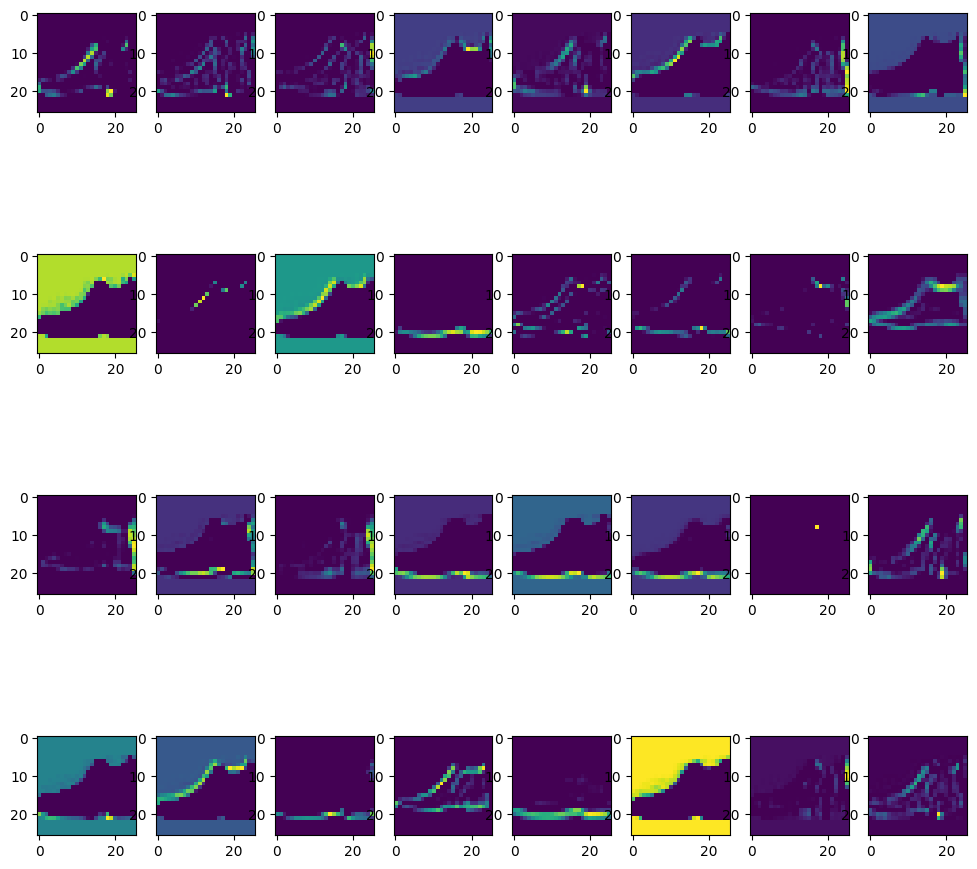

In [10]:
import matplotlib.pyplot as plt

# Seleccionar una imagen de prueba
test_image = test_images[0]
test_image = np.expand_dims(test_image, axis=0)

# Obtener las salidas de todas las capas del modelo
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]

# Crear un nuevo modelo que devolverá estas salidas
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Obtener las activaciones
activations = activation_model.predict(test_image)

# Función para visualizar las activaciones
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(12,12))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

# Visualizar la activación de la primera capa convolucional
display_activation(activations, col_size=8, row_size=4, act_index=0)
